<a href="https://colab.research.google.com/github/jmbanda/BigDataProgramming_2019/blob/master/Exam2_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 2 - 11/6/2019

**What can you use:**

1) Anything...... that can be stored locally on your computer. No internet usage will be allowed, you will have to disable it during the exam. 

2) All slides, notebooks, examples you can find, etc. is fair game. But they have to be found offline (locally in your computer).

3) Printouts .... if you want. 

**What is not allowed:**

1) Cellphones, radios, any device that can be used to communicate. 

2) Headphones, by any means unless  they are required for medical reasons (need to present formal justification)

3) Browsing the internet at all or using any messaging apps. I will be walking around to make sure this is not happening.

3) Any talking or verbal/non-verbal communication between students. You should only communicate with the professor. 

IMPORTANT: Cheating will not be tolerated and will be punished with an academic dishonesty report, transcript annotation, and immediate failing of the course.  Do not risk your grade and course standing for getting a few extra points.

**What to submit:**

One single ZIP file named StudentName-Exam2.zip with the following contents:

- PDF file with all answers displayed
- Notebook ipnyb file with non-executed code blocks (clean them before submitting)

Failure to follow directions will result in a loss of points. If we can't read your ipnyb file, you will get a zero for the exam.

Submission will be done via iCollege, in front of the instructor.

# Student Name:

Please write your full name and student id in the following text block:

*Answer goes here*

# Theory Section

*Please type your answer on the assigned text block underneath each question.*

**Question 1 (5 points): What does CRUD stand for?**

*   Create 
*   Read 
*   Update 
*   Delete

**Question 2 (5 points): What does it mean for a database transaction to be isolated? (explain)**

*A set of TXNs is isolated if their eﬀect is as if all were executed serially*

**Question 3 (5 points): What is the purpose of foreign keys in a database?**

*An identiﬁer for a column on a table that links it to another table in a database*

**Question 4 (5 points): Can you have a database with no primary keys? Explain your answer.**

*Yes, but you should not do this as there won't be any relational advantages*

# Practical Section

**Be sure to READ the entire set of instuctions before you start answering so you plan your code accordingly**

With the dataset found with the exam notebook. Build the following models. Please use the provided code sections for all your code.

*Using 80% of the dataset for training and 20% for testing* - with a RandomState = 0. (Pay close attention to this or all your numbers might not match the solution key).

**Model 1**) Use a pipeline to use the appropiate feature extraction module and train a **multi-nomial Naive Bayes** model. Parameters needed: None.

**Model 2**) Use a pipeline to use the appropiate feature extraction module and train a **Random Forest** model. Parameters needed: `n_estimators = 100, random_state = 0`.

**Model 3**) Use a pipeline to use the appropiate feature extraction module and train a **Linear SVM** model. Parameters needed: `C=1E10, random_state = 0`

**Model 4**) Use a pipeline to use the appropiate feature extraction module and train an **Non-linear SVM** model with an rbf kernel. Parameters needed: `C=1E6, random_state = 0, gamma='auto'`


For each model you need to provide the following evaluations.

a) **Confusion Matrix plot** (heatmap) with text labels (not numeric)

b) **Classification report** with text labels (not numeric)

c) **Additional required metrics**: *Accuracy, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.*

At the end you need to provide a properly labeled table with the additional metric results for each model and sort it by the highest accuracy to the lowest.

**Place all the imports you might need in the following code block (5 points)**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Model Imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#Metrics Imports
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


**Load and investigate the dataset in the following code block (5 points)**

In [0]:
df = pd.read_csv (r'examDataset.csv')
df_labels = df.drop(['document'],axis=1)
df_labels = df_labels.drop_duplicates()
df_labels.head(12)

,targetNum,target
0,1,comp.windows.x
1,3,rec.autos
2,4,rec.motorcycles
3,6,sci.med
4,7,soc.religion.christian
5,2,misc.forsale
7,0,comp.sys.ibm.pc.hardware
11,9,talk.politics.misc
28,5,sci.electronics
41,8,talk.politics.guns


**Create your training and testing sets in the following code block (5 points)**

In [0]:
X = df['document']
y = df['target']
yNum = df['targetNum']
unique_labels = y.unique()
X_train, X_test, y_train, y_test = train_test_split(X, yNum, test_size=0.2, random_state=0)

## Model 1 - Naive Bayes Model Code Section

**Build the pipeline for Multi Nomial Naive Bayes Classifier, fit the model and predict on the test set in the following code block (15 points)**

In [0]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
labels = model.predict(X_test)

**Confusion Matrix plot (heatmap) for Naive Bayes model code and result goes in the following code block. Note: The class names should show in the plot, not the class numbers (10 points)**

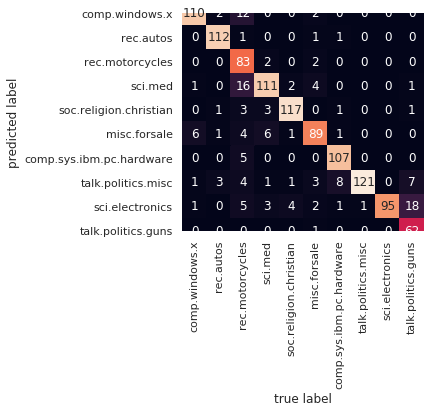

In [0]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Clasiffication Report for Naive Bayes Model goes in the following code block. Note: The class names should show in the report, not the class numbers. (10 points)**

In [0]:
print(classification_report(y_test, labels, target_names=unique_labels))

                          precision    recall  f1-score   support

          comp.windows.x       0.87      0.92      0.90       119
               rec.autos       0.97      0.94      0.96       119
         rec.motorcycles       0.95      0.62      0.75       133
                 sci.med       0.82      0.88      0.85       126
  soc.religion.christian       0.93      0.94      0.93       125
            misc.forsale       0.82      0.86      0.84       104
comp.sys.ibm.pc.hardware       0.96      0.90      0.93       119
      talk.politics.misc       0.81      0.99      0.89       122
         sci.electronics       0.73      1.00      0.84        95
      talk.politics.guns       0.98      0.70      0.82        89

                accuracy                           0.87      1151
               macro avg       0.89      0.87      0.87      1151
            weighted avg       0.89      0.87      0.87      1151



**Code and result to print required metrics for Naive Bayes Model goes in the following code block. Note: Label every metric properly (10 points)**

In [0]:
print('Accuracy:', metrics.accuracy_score(y_test,labels))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,labels))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, labels))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, labels)))
results_1= {'Experiment': 'Naive Bayes', 'Accuracy' : metrics.accuracy_score(y_test,labels), 'MAE': metrics.mean_absolute_error(y_test,labels), 'MSE':metrics.mean_squared_error(y_test,labels)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test,labels)), 'MS':metrics.accuracy_score(y_test,labels)}


Accuracy: 0.8748913987836664
Mean Absolute Error: 0.3197219808861859
Mean Squared Error: 1.1920069504778454
Root Mean Squared Error: 1.0917907081844238


## Model 2 - Random Forest

**Build the pipeline for Random Forest Classifier, fit the model and predict on the test set in the following code block (15 points)**

In [0]:
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators = 100, random_state = 0))

model.fit(X_train, y_train)
labels = model.predict(X_test)

**Confusion Matrix plot (heatmap) for Random Forest model code and result goes in the following code block. Note: The class names should show in the plot, not the class numbers (10 points)**

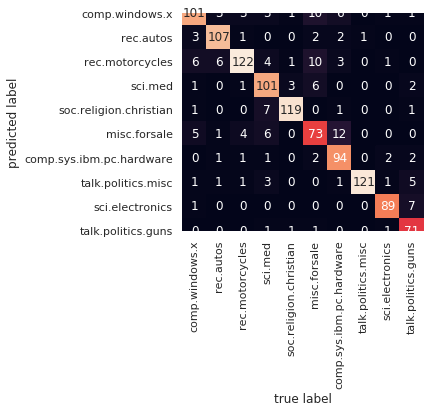

In [0]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Clasiffication Report for Random Forest Model goes in the following code block. Note: The class names should show in the report, not the class numbers. (10 points)**

In [0]:
print(classification_report(y_test, labels, target_names=unique_labels))

                          precision    recall  f1-score   support

          comp.windows.x       0.78      0.85      0.81       119
               rec.autos       0.92      0.90      0.91       119
         rec.motorcycles       0.80      0.92      0.85       133
                 sci.med       0.89      0.80      0.84       126
  soc.religion.christian       0.92      0.95      0.94       125
            misc.forsale       0.72      0.70      0.71       104
comp.sys.ibm.pc.hardware       0.91      0.79      0.85       119
      talk.politics.misc       0.90      0.99      0.95       122
         sci.electronics       0.92      0.94      0.93        95
      talk.politics.guns       0.95      0.80      0.87        89

                accuracy                           0.87      1151
               macro avg       0.87      0.86      0.87      1151
            weighted avg       0.87      0.87      0.87      1151



**Code and result to print required metrics for Random Forest Model goes in the following code block. Note: Label every metric properly (10 points)**

In [0]:
print('Accuracy:', metrics.accuracy_score(y_test,labels))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,labels))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, labels))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, labels)))
results_2= {'Experiment': 'RandomForest', 'Accuracy': metrics.accuracy_score(y_test,labels), 'MAE': metrics.mean_absolute_error(y_test,labels), 'MSE':metrics.mean_squared_error(y_test,labels)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test,labels)), 'MS':metrics.accuracy_score(y_test,labels)}

Accuracy: 0.8670721112076455
Mean Absolute Error: 0.3788010425716768
Mean Squared Error: 1.5499565595134666
Root Mean Squared Error: 1.2449725135574146


## Model 3 - Linear SVM

**Build the pipeline for Linear SVM Classifier, fit the model and predict on the test set in the following code block (15 points)**

In [0]:
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1E10, random_state = 0))

model.fit(X_train, y_train)
labels = model.predict(X_test)

**Confusion Matrix plot (heatmap) for Linear SVM model code and result goes in the following code block. Note: The class names should show in the plot, not the class numbers (10 points)**

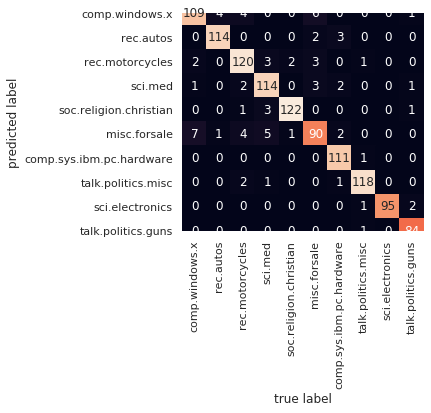

In [0]:
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Clasiffication Report for Linear SVM Model goes in the following code block. Note: The class names should show in the report, not the class numbers. (10 points)**

In [0]:
print(classification_report(y_test, labels, target_names=unique_labels))

                          precision    recall  f1-score   support

          comp.windows.x       0.88      0.92      0.90       119
               rec.autos       0.96      0.96      0.96       119
         rec.motorcycles       0.92      0.90      0.91       133
                 sci.med       0.93      0.90      0.92       126
  soc.religion.christian       0.96      0.98      0.97       125
            misc.forsale       0.82      0.87      0.84       104
comp.sys.ibm.pc.hardware       0.99      0.93      0.96       119
      talk.politics.misc       0.97      0.97      0.97       122
         sci.electronics       0.97      1.00      0.98        95
      talk.politics.guns       0.99      0.94      0.97        89

                accuracy                           0.94      1151
               macro avg       0.94      0.94      0.94      1151
            weighted avg       0.94      0.94      0.94      1151



**Code and result to print required metrics for Linear SVM Model goes in the following code block. Note: Label every metric properly (10 points)**


In [0]:
print('Accuracy:', metrics.accuracy_score(y_test,labels))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,labels))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, labels))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, labels)))
results_3= {'Experiment': 'Linear SVM', 'Accuracy': metrics.accuracy_score(y_test,labels), 'MAE': metrics.mean_absolute_error(y_test,labels), 'MSE':metrics.mean_squared_error(y_test,labels)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test,labels)), 'MS':metrics.accuracy_score(y_test,labels)}


Accuracy: 0.9357080799304952
Mean Absolute Error: 0.18853171155516943
Mean Squared Error: 0.7497827975673328
Root Mean Squared Error: 0.8658999928209566


## Model 4 - Non-Linear SVM



**Build the pipeline for Non-Linear SVM Classifier, fit the model and predict on the test set in the following code block (15 points)**

In [0]:
model = make_pipeline(TfidfVectorizer(), SVC(kernel='rbf', C=1E6, random_state = 0, gamma='auto'))

model.fit(X_train, y_train)
labels = model.predict(X_test)

**Confusion Matrix plot (heatmap) for Non-Linear SVM model code and result goes in the following code block. Note: The class names should show in the plot, not the class numbers (10 points)**

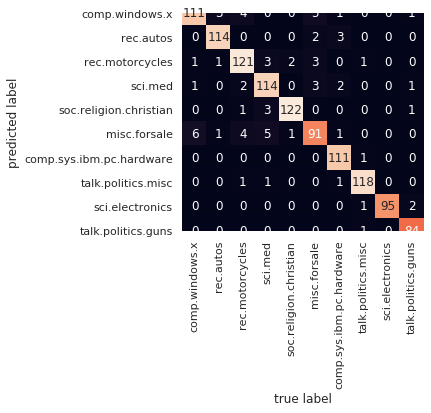

In [0]:
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Clasiffication Report for Non-Linear SVM Model goes in the following code block. Note: The class names should show in the report, not the class numbers. (10 points)**

In [0]:
print(classification_report(y_test, labels, target_names=unique_labels))

                          precision    recall  f1-score   support

          comp.windows.x       0.89      0.93      0.91       119
               rec.autos       0.96      0.96      0.96       119
         rec.motorcycles       0.92      0.91      0.91       133
                 sci.med       0.93      0.90      0.92       126
  soc.religion.christian       0.96      0.98      0.97       125
            misc.forsale       0.83      0.88      0.85       104
comp.sys.ibm.pc.hardware       0.99      0.93      0.96       119
      talk.politics.misc       0.98      0.97      0.97       122
         sci.electronics       0.97      1.00      0.98        95
      talk.politics.guns       0.99      0.94      0.97        89

                accuracy                           0.94      1151
               macro avg       0.94      0.94      0.94      1151
            weighted avg       0.94      0.94      0.94      1151



**Code and result to print required metrics for Non-Linear SVM Model goes in the following code block. Note: Label every metric properly (10 points)**


In [0]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,labels))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,labels))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, labels))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, labels)))
results_4= {'Experiment': 'Non-Linear SVM', 'Accuracy': metrics.accuracy_score(y_test,labels), 'MAE': metrics.mean_absolute_error(y_test,labels), 'MSE':metrics.mean_squared_error(y_test,labels)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test,labels)), 'MS':metrics.accuracy_score(y_test,labels)}


Accuracy: 0.9391833188531712
Mean Absolute Error: 0.17810599478714162
Mean Squared Error: 0.7115551694178974
Root Mean Squared Error: 0.843537295807303


## Final Model Comparison

**All code to show the experiments result table and sort the model metrics by highest accuracy should go in the following code block. Note: Each experiment and metric should be labeled properly (15 points).**

In [0]:
data = [results_1,results_2,results_3,results_4] 
Results_df = pd.DataFrame(data) 
Results_df = Results_df.sort_values(by=['Accuracy'], ascending=False)
Results_df.head()

,Experiment,Accuracy,MAE,MSE,RMSE,MS
3,Non-Linear SVM,0.939183,0.178106,0.711555,0.843537,0.939183
2,Linear SVM,0.935708,0.188532,0.749783,0.865900,0.935708
0,Naive Bayes,0.874891,0.319722,1.192007,1.091791,0.874891
1,RandomForest,0.867072,0.378801,1.549957,1.244973,0.867072


## Based on the table you just displayed answer the following questions in the provided text fields.

**a) What is the best performing model? (5 points)**

*Answer for a goes here*

**b) What is the most interesting result you found here? Is there any model that performs unexpectedly? (5 points)**

*Answer for a goes here*

## **Graduate Student Question (undergraduates can answer for extra credit)**

Improve the Random Forest model by using a Grid Search with the following parameters: random_state set to 0  and n_estimators set to 100, 150, 200
cross-validation needs to be set to 3. **(50 points -  total)**

Note: DO NOT time this execution.

**Write the code to create the Grid Search, build the pipeline and train the model on the following code block. Display the best parameters as the result. (10 points)**

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'randomforestclassifier__n_estimators': [100, 150,200], 'randomforestclassifier__random_state': [0] }

pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

grid = GridSearchCV(pipeline, param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 0}


**Now use the best model to make predictions on the test set in the following code block. (10 points)**

In [0]:
model = grid.best_estimator_
labels = model.predict(X_test)

**Clasiffication Report for improved Random Forest model goes in the following code block. Note: The class names should show in the report, not the class numbers. (10 points)**

In [0]:
print(classification_report(y_test, labels, target_names=unique_labels))

                          precision    recall  f1-score   support

          comp.windows.x       0.80      0.86      0.83       119
               rec.autos       0.89      0.91      0.90       119
         rec.motorcycles       0.79      0.91      0.85       133
                 sci.med       0.89      0.79      0.84       126
  soc.religion.christian       0.91      0.94      0.93       125
            misc.forsale       0.76      0.73      0.75       104
comp.sys.ibm.pc.hardware       0.92      0.82      0.87       119
      talk.politics.misc       0.92      1.00      0.96       122
         sci.electronics       0.95      0.95      0.95        95
      talk.politics.guns       0.97      0.83      0.90        89

                accuracy                           0.88      1151
               macro avg       0.88      0.87      0.88      1151
            weighted avg       0.88      0.88      0.88      1151



**Code and result to print required metrics for improved Random Forest model goes in the following code block. Note: Label every metric properly (10 points)**


In [0]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,labels))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,labels))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, labels))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, labels)))
results_5= {'Experiment': 'Improved Random Forest', 'Accuracy': metrics.accuracy_score(y_test,labels), 'MAE': metrics.mean_absolute_error(y_test,labels), 'MSE':metrics.mean_squared_error(y_test,labels)  , 'RMSE':np.sqrt(metrics.mean_squared_error(y_test,labels)), 'MS':metrics.accuracy_score(y_test,labels)}


Accuracy: 0.8757602085143353
Mean Absolute Error: 0.33883579496090355
Mean Squared Error: 1.306689834926151
Root Mean Squared Error: 1.1431053472563897


**Add the improved model to your final model comparison table and sort by Accuracy. (5 points)**

In [0]:
data = [results_1,results_2,results_3,results_4, results_5] 
Results_df = pd.DataFrame(data) 
Results_df = Results_df.sort_values(by=['Accuracy'], ascending=False)
Results_df.head()

,Experiment,Accuracy,MAE,MSE,RMSE,MS
3,Non-Linear SVM,0.939183,0.178106,0.711555,0.843537,0.939183
2,Linear SVM,0.935708,0.188532,0.749783,0.865900,0.935708
4,Improved Random Forest,0.875760,0.338836,1.306690,1.143105,0.875760
0,Naive Bayes,0.874891,0.319722,1.192007,1.091791,0.874891
1,RandomForest,0.867072,0.378801,1.549957,1.244973,0.867072


**Lastly, what did you see happen? What is the take away from doing a grid search? Have we found the best model? (5 points)**

*Answer goes here*

*You are done!!!!!!!!!!!!*

**Prepare your submission:**

One single ZIP file named StudentName-Exam2.zip with the following contents:

- PDF file with all answers displayed
- Notebook ipnyb file with non-executed code blocks (clean them before submitting)

Failure to follow directions will result in a loss of points. If we can't read your ipnyb file, you will get a zero for the exam.

Submission will be done via iCollege, in front of the instructor. If I catch you on the internet while others are still working on their exams you will get a zero. 